<a href="https://colab.research.google.com/github/RioAccountant/02-RMSE_Regression-for-Housing-Prices/blob/main/Project_2_Housing_Description_for_Students_10_22_24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 2: Housing Price Prediction


##Project definition: will be  done using Regression prediction, including feature scaling and regularization techniques wherein the
goal is to minimize the RMS ***percentage*** error ( root mean squared percentage error - RMSPE ) on your prediction of the house sales price.



##Process & Approach: initially we will focus on the correlation of numerical based attributes to set basic initial parameters for testing and training of the supervised model.

##In a forward phase of the project, categorical data may be incorporated to refine.

##For this analysis the type of regression analysis to be used will be Root Mean Squared Percentage Error "RMSPE".  An advantage to this methodology is that percentage scores are more readily interpreted, with lower values indicating predictions approaching actuals and inversely so.  The disadvantage of this method is its sensitivity to outliers.

##Data Collection: for the project can be located at: AWS S3 at https://ddc-datascience.s3.amazonaws.com/Projects/Project.2-Housing/Data/Housing.Data.csv.

### In addition, A data dictionary file is available at AWS S3 at Housing Data Dictionary.

## Resource Tools & Libraries: used for the cleaning, transforming, querying the data, are below listed.



In [ ]:
#Refernce & run script to initialize libraries thought to be needed for project.
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import numpy.typing as npt
import seaborn as sns
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics

#Data retreival, cleansing and exploration:

##Establish connection to data and annotate source.

In [ ]:
#Establish connection to datafile and assign initial variable ID
url = 'https://ddc-datascience.s3.amazonaws.com/Projects/Project.2-Housing/Data/Housing.Data.csv'
housing = pd.read_csv(url)

##EDA: initial exploration of data to determine how best to reduce and refine initial dataset for model.

In [ ]:
housing.head()
#81 columns-we need to reduce - focus first to ID target and potential numerical correlations

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,905101070,20,RL,62.0,14299,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,7,2007,WD,Normal,115400
1,905101330,90,RL,72.0,10791,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,Shed,500,10,2006,WD,Normal,90000
2,903454090,50,RM,50.0,9000,Pave,NaN,Reg,Bnk,AllPub,...,0,NaN,NaN,NaN,0,12,2007,WD,Normal,141000
3,533244030,60,FV,68.0,7379,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,254000
4,909252020,70,RL,60.0,7200,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,4,2009,WD,Normal,155000


In [ ]:
housing.shape


(2637, 81)

In [ ]:
housing.info()
#dtypes: float64(11), int64(27), object(43)-here we can reduce the initial pass to numerical
#also note the count difference, if table fully populated all non-nulls wb equivalent

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2637 entries, 0 to 2636
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2637 non-null   int64  
 1   MS SubClass      2637 non-null   int64  
 2   MS Zoning        2637 non-null   object 
 3   Lot Frontage     2188 non-null   float64
 4   Lot Area         2637 non-null   int64  
 5   Street           2637 non-null   object 
 6   Alley            180 non-null    object 
 7   Lot Shape        2637 non-null   object 
 8   Land Contour     2637 non-null   object 
 9   Utilities        2637 non-null   object 
 10  Lot Config       2637 non-null   object 
 11  Land Slope       2637 non-null   object 
 12  Neighborhood     2637 non-null   object 
 13  Condition 1      2637 non-null   object 
 14  Condition 2      2637 non-null   object 
 15  Bldg Type        2637 non-null   object 
 16  House Style      2637 non-null   object 
 17  Overall Qual  

###Initial exploration returned a data set of 2637x81, transactions & attributes, respectively; with 11 floats, 27 integers, & 43 objects



#Data Cleaning: based on the initial evaluation we the next steps we will:
*   Drop all non-numerical columns
*   Drop all rows in the remaindermen that contain nulls.
*   Drop the property ID, albeit numerical, it is not informative.
*   Identify the target: SalePrice
*   Identi







In [ ]:
housing_num = housing.select_dtypes(exclude=['object'])
housing_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2637 entries, 0 to 2636
Data columns (total 38 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2637 non-null   int64  
 1   MS SubClass      2637 non-null   int64  
 2   Lot Frontage     2188 non-null   float64
 3   Lot Area         2637 non-null   int64  
 4   Overall Qual     2637 non-null   int64  
 5   Overall Cond     2637 non-null   int64  
 6   Year Built       2637 non-null   int64  
 7   Year Remod/Add   2637 non-null   int64  
 8   Mas Vnr Area     2614 non-null   float64
 9   BsmtFin SF 1     2636 non-null   float64
 10  BsmtFin SF 2     2636 non-null   float64
 11  Bsmt Unf SF      2636 non-null   float64
 12  Total Bsmt SF    2636 non-null   float64
 13  1st Flr SF       2637 non-null   int64  
 14  2nd Flr SF       2637 non-null   int64  
 15  Low Qual Fin SF  2637 non-null   int64  
 16  Gr Liv Area      2637 non-null   int64  
 17  Bsmt Full Bath

In [ ]:
housing_num_nnull = housing_num.dropna(axis=0, how='any')
housing_num_nnull.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2033 entries, 0 to 2636
Data columns (total 38 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2033 non-null   int64  
 1   MS SubClass      2033 non-null   int64  
 2   Lot Frontage     2033 non-null   float64
 3   Lot Area         2033 non-null   int64  
 4   Overall Qual     2033 non-null   int64  
 5   Overall Cond     2033 non-null   int64  
 6   Year Built       2033 non-null   int64  
 7   Year Remod/Add   2033 non-null   int64  
 8   Mas Vnr Area     2033 non-null   float64
 9   BsmtFin SF 1     2033 non-null   float64
 10  BsmtFin SF 2     2033 non-null   float64
 11  Bsmt Unf SF      2033 non-null   float64
 12  Total Bsmt SF    2033 non-null   float64
 13  1st Flr SF       2033 non-null   int64  
 14  2nd Flr SF       2033 non-null   int64  
 15  Low Qual Fin SF  2033 non-null   int64  
 16  Gr Liv Area      2033 non-null   int64  
 17  Bsmt Full Bath   20

In [ ]:
housing_num_nnull =  housing_num_nnull.drop(['PID'], axis=1)
housing_num_nnull.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2033 entries, 0 to 2636
Data columns (total 37 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MS SubClass      2033 non-null   int64  
 1   Lot Frontage     2033 non-null   float64
 2   Lot Area         2033 non-null   int64  
 3   Overall Qual     2033 non-null   int64  
 4   Overall Cond     2033 non-null   int64  
 5   Year Built       2033 non-null   int64  
 6   Year Remod/Add   2033 non-null   int64  
 7   Mas Vnr Area     2033 non-null   float64
 8   BsmtFin SF 1     2033 non-null   float64
 9   BsmtFin SF 2     2033 non-null   float64
 10  Bsmt Unf SF      2033 non-null   float64
 11  Total Bsmt SF    2033 non-null   float64
 12  1st Flr SF       2033 non-null   int64  
 13  2nd Flr SF       2033 non-null   int64  
 14  Low Qual Fin SF  2033 non-null   int64  
 15  Gr Liv Area      2033 non-null   int64  
 16  Bsmt Full Bath   2033 non-null   float64
 17  Bsmt Half Bath   20

#Additional EDA
*   Identification of target: Sales Price
*   Review and evaluate initial correlations.



In [ ]:
#corr matrix of top features in B&W list.
corr_matrix = housing_num_nnull.corrwith(housing_num_nnull['SalePrice']).to_frame(name='Correlation')
corr_matrix.sort_values(by='Correlation', ascending=False)
#Decision made to focus on the top 12

,Correlation
SalePrice,1.000000
Overall Qual,0.810953
Gr Liv Area,0.713131
Garage Cars,0.657323
Total Bsmt SF,0.646068
1st Flr SF,0.640274
Garage Area,0.637670
Year Built,0.564329
Full Bath,0.558774
Garage Yr Blt,0.547303


In [ ]:
#isolate and assign variable the top twelve
top_twelve = housing_num_nnull.corr().SalePrice.sort_values(ascending=False).head(13)
top_twelve2 = top_twelve.drop(['SalePrice'])
top_twelve2


,SalePrice
Overall Qual,0.810953
Gr Liv Area,0.713131
Garage Cars,0.657323
Total Bsmt SF,0.646068
1st Flr SF,0.640274
Garage Area,0.637670
Year Built,0.564329
Full Bath,0.558774
Garage Yr Blt,0.547303
Year Remod/Add,0.544543


In [ ]:
#corr matrix of top features in Black & White Visual
top_twelve_corr = housing_num_nnull[top_twelve.index].corr()
top_twelve_corr

,SalePrice,Overall Qual,Gr Liv Area,Garage Cars,Total Bsmt SF,1st Flr SF,Garage Area,Year Built,Full Bath,Garage Yr Blt,Year Remod/Add,Mas Vnr Area,TotRms AbvGrd
SalePrice,1.000000,0.810953,0.713131,0.657323,0.646068,0.640274,0.637670,0.564329,0.558774,0.547303,0.544543,0.523401,0.521603
Overall Qual,0.810953,1.000000,0.580875,0.587851,0.566279,0.512428,0.547597,0.610969,0.554054,0.586730,0.580226,0.436468,0.401885
Gr Liv Area,0.713131,0.580875,1.000000,0.519207,0.442615,0.550424,0.501776,0.250785,0.623703,0.285388,0.320095,0.413521,0.810763
Garage Cars,0.657323,0.587851,0.519207,1.000000,0.460192,0.468766,0.852322,0.530367,0.525420,0.598678,0.468411,0.363479,0.425424
Total Bsmt SF,0.646068,0.566279,0.442615,0.460192,1.000000,0.814965,0.506887,0.427118,0.338883,0.371220,0.312522,0.403243,0.271501
1st Flr SF,0.640274,0.512428,0.550424,0.468766,0.814965,1.000000,0.516539,0.329064,0.371701,0.292757,0.273869,0.402111,0.368884
Garage Area,0.637670,0.547597,0.501776,0.852322,0.506887,0.516539,1.000000,0.474519,0.441632,0.586653,0.409984,0.374083,0.375987
Year Built,0.564329,0.610969,0.250785,0.530367,0.427118,0.329064,0.474519,1.000000,0.498467,0.838299,0.633090,0.324623,0.135394
Full Bath,0.558774,0.554054,0.623703,0.525420,0.338883,0.371701,0.441632,0.498467,1.000000,0.506197,0.490936,0.280389,0.523496
Garage Yr Blt,0.547303,0.586730,0.285388,0.598678,0.371220,0.292757,0.586653,0.838299,0.506197,1.000000,0.656818,0.271761,0.177774


In [ ]:
#top_twelve_list = top_twelve.index.tolist()
#top_twelve_list
#for later use

<Axes: >

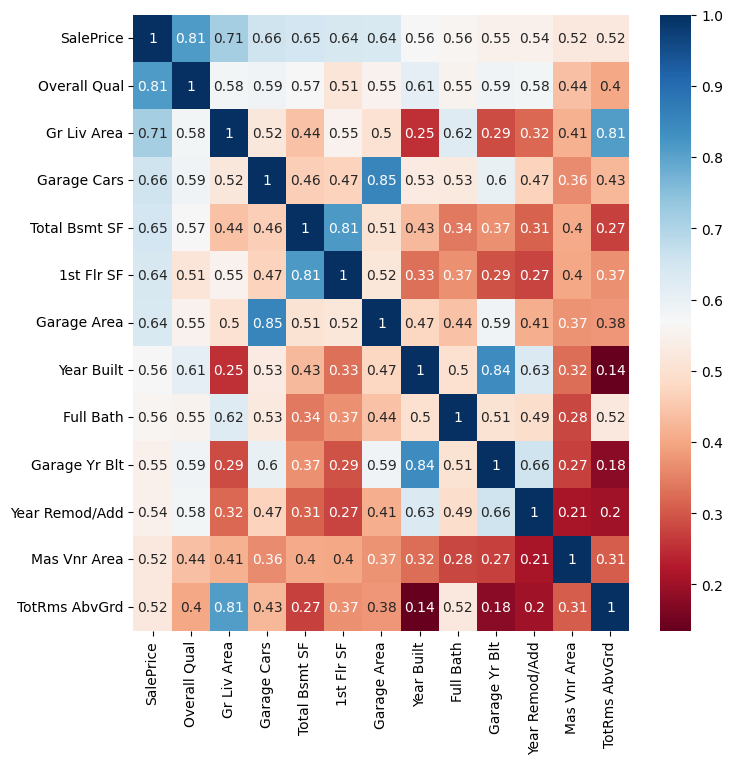

In [ ]:
#Plot the correlation matrix in color
plt.figure(figsize=(8,8))
Correlation_matrix=housing_num_nnull.corr()
sns.heatmap(top_twelve_corr, cmap='RdBu', annot=True)
#redundant, but if you like color

Plot the top_twelve predictors for additional visual cues.

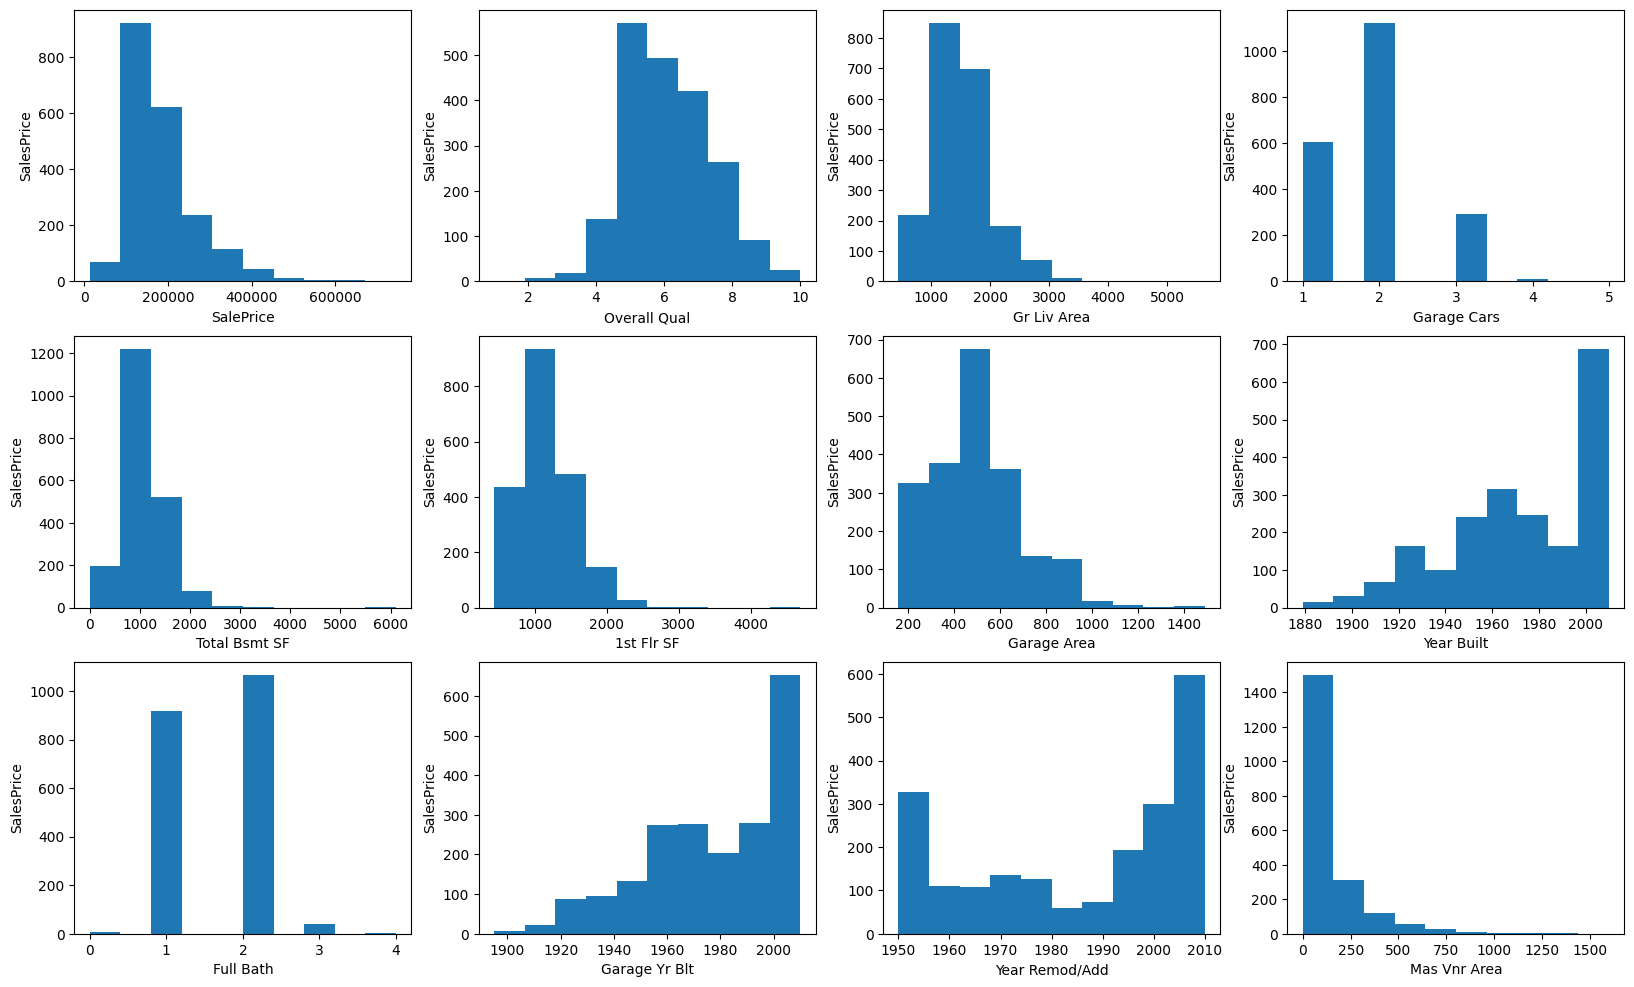

In [ ]:
# Now to plot our top 12 best correlated to view the distribution predictors
fig, axs = plt.subplots(3,4, figsize = (20,12)) # Plots for the top 12
column_names = top_twelve_list
n = 0
for i in range(3): # Loop through rows
  for j in range(4): # Loop through columns

    axs[i,j].hist(housing_num_nnull[top_twelve_list[n]])


    axs[i,j].set_xlabel(column_names[n])
    axs[i,j].set_ylabel('SalesPrice')
    n = n + 1

##Gleaned from above:Overall quality; gross living area; garage area; and rooms above ground appear to be those features that resemble a 'normal' distribution.  Also, newer homes; those remodeled or have new/improved garage spaces appear to be drivers of sale price in later years.

#Model Configuration & Cross Validation

In [ ]:
#This is for all variables, but lets begin with the twelve in isolation
#X=housing_num_nnull.drop(['SalePrice'], axis=1)
#X2=sm.add_constant(X)
#print(X2)
#y=housing_num_nnull['SalePrice']


#y = housing_num_nnull['SalePrice']
#x_train, x_test, y_train, y_test = train_test_split(X2, y, test_size=0.2, random_state=42)

In [ ]:
#For reference only
#top_twelve_list

['SalePrice',
 'Overall Qual',
 'Gr Liv Area',
 'Garage Cars',
 'Total Bsmt SF',
 '1st Flr SF',
 'Garage Area',
 'Year Built',
 'Full Bath',
 'Garage Yr Blt',
 'Year Remod/Add',
 'Mas Vnr Area',
 'TotRms AbvGrd']

In [ ]:
#Try to isolate 12-WHY can I not pass the list name in-it worked 1x
X = housing_num_nnull[['Overall Qual',
 'Gr Liv Area',
 'Garage Cars',
 'Total Bsmt SF',
 '1st Flr SF',
 'Garage Area',
 'Year Built',
 'Full Bath',
 'Garage Yr Blt',
 'Year Remod/Add',
 'Mas Vnr Area',
 'TotRms AbvGrd']]


X2=sm.add_constant(X)

print(X2)

y=housing_num_nnull['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.2, random_state=42)

      const  Overall Qual  Gr Liv Area  Garage Cars  Total Bsmt SF  \
0       1.0             4         1005          2.0         1005.0   
1       1.0             4         1296          2.0            0.0   
2       1.0             6         1375          1.0          780.0   
3       1.0             8         1848          2.0          975.0   
4       1.0             7         1135          2.0          560.0   
...     ...           ...          ...          ...            ...   
2632    1.0             6         1176          2.0          816.0   
2633    1.0             7         1061          2.0         1054.0   
2634    1.0             8         1226          2.0         1226.0   
2635    1.0             6         1350          2.0         1064.0   
2636    1.0             7         2322          2.0         1037.0   

      1st Flr SF  Garage Area  Year Built  Full Bath  Garage Yr Blt  \
0           1005        440.0        1964          1         1964.0   
1           1296 

In [ ]:
#Fit Model to linear using Statsmodels/argh why did this break.
fit_twelve = sm.OLS(y_train, X_train).fit()
fit_twelve.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     612.0
Date:                Tue, 22 Oct 2024   Prob (F-statistic):               0.00
Time:                        03:06:56   Log-Likelihood:                -19279.
No. Observations:                1626   AIC:                         3.858e+04
Df Residuals:                    1613   BIC:                         3.865e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -1.189e+06   1.18e+05    -10.099      0.000   -1.42e+06   -9.58e+05
Overall Qual    2.116e+04   1005.663     21.037      0.000    1.92e+04    2.31e+04
Gr Liv Area       55.4934      3.788     14.651      0.000      48.064      62.923
Garage Cars     9497.2165   2627.447      3.615      0.000    4343.649    1.47e+04
Total Bsmt SF     18.6059      3.666      5.075      0.000      11.415      25.797
1st Flr SF        14.6011      4.149      3.519      0.000       6.463      22.740
Garage Area       19.8372      9.217      2.152      0.032       1.759      37.916
Year Built       256.7550     55.449      4.630      0.000     147.995     365.515
Full Bath      -1.048e+04   2327.851     -4.500      0.000    -1.5e+04   -5909.488
Garage Yr Blt    -73.5794     67.475     -1.090      0.276    -205.927      58.768
Year Remod/Add   380.2520     56.863      6.687      0.000     268.720     491.785
Mas Vnr Area      38.6182      5.620      6.872      0.000      27.596      49.641
TotRms AbvGrd  -1319.5920    974.320     -1.354      0.176   -3230.658     591.474
==============================================================================
Omnibus:                      838.320   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           109525.117
Skew:                          -1.390   Prob(JB):                         0.00
Kurtosis:                      43.111   Cond. No.                     5.70e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.7e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Model processing-fit & assessment using our top 12 predictors to the target: SalePrice.

In [ ]:
#Break into 2 populations

X = housing_num_nnull[['Overall Qual',
 'Gr Liv Area',
 'Garage Cars',
 'Total Bsmt SF',
 '1st Flr SF',
 'Garage Area',
 'Year Built',
 'Full Bath',
 'Garage Yr Blt',
 'Year Remod/Add',
 'Mas Vnr Area',
 'TotRms AbvGrd']]
y = housing_num_nnull['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=4)


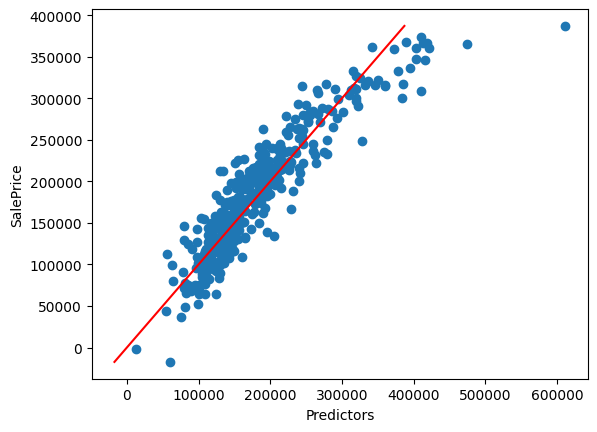

In [ ]:
#Check performance to test data-most are clustering along the line, but a few outliers
y_pred = model.predict(X_test)
plt.scatter(y_test, y_pred)
plt.plot([min(y_pred), max(y_pred)],[min(y_pred), max(y_pred)], c='red')

plt.xlabel('Predictors')
plt.ylabel('SalePrice')
plt.show()

In [ ]:
#quick view of n=12/predicted to actual for reference
list(zip(y_test,y_pred,))[:12]

[(227000, 219854.65049308073),
 (287500, 265926.8618027272),
 (214000, 231760.89464794472),
 (151000, 174747.00460982462),
 (187500, 216202.9561264352),
 (154000, 164992.89382737107),
 (152500, 192291.07770872884),
 (185000, 232131.76503098244),
 (194201, 244749.1880262494),
 (188500, 227550.39278830867),
 (185000, 149497.42553438107),
 (342000, 361845.0402444438)]

In [ ]:
#Define the function for the Model type: RMSPE
def rmspe (y_test, y_pred):
  return np.sqrt(np.mean(np.square((y_test - y_pred) / y_test))) * 100


RMSPE: The errors in terms of percentage

In [ ]:
#RMSE % V1
np.sqrt(np.mean(np.square((y_test - y_pred) / y_test))) * 100

20.847149419083014

In [ ]:
#RMSE % V2
(((y_test - y_pred) / y_test) **2).mean()**(1/2) * 100

20.847149419083014

Result is 20.847% - deemed to be acceptable threshhold percentage in contemplation of the visualized outliers.

##Cross Validation Section

In [ ]:
#Cross Validation w np-THIS IS NOT WORKING
n = 500
results = np.zeros(n)
for idx in range(n):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
  housing_model = sm.OLS(y_train, X_train).fit()
  y_pred = housing_model.predict(X_test)
  results[idx] = rmspe(y_test,y_pred)


print(f"CV RMSPE: {results.mean().round(2)}")

CV RMSPE: 24.06


In [ ]:
#Secondary evaluation & review data points-Suggests that there are extreme points at both ends of spectrum
y_test.max(), y_test.min(), results.max(), results.min(), y.min(), y.max()

(535000, 35000, 35.97639059676569, 17.577825472386078, 12789, 745000)

View the QQ Plot

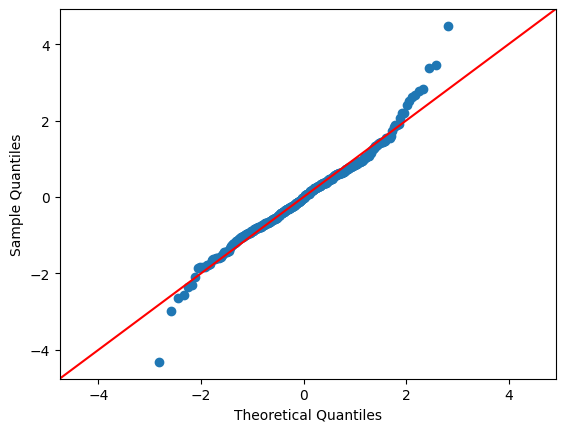

In [ ]:
# QQ Plot - Residuals of Linear Model Above

res = y_test - y_pred
sm.qqplot(res, fit=True, line="45")
plt.show()
#Appears to be normally distributed in all material respects and except for outliers annotated above.

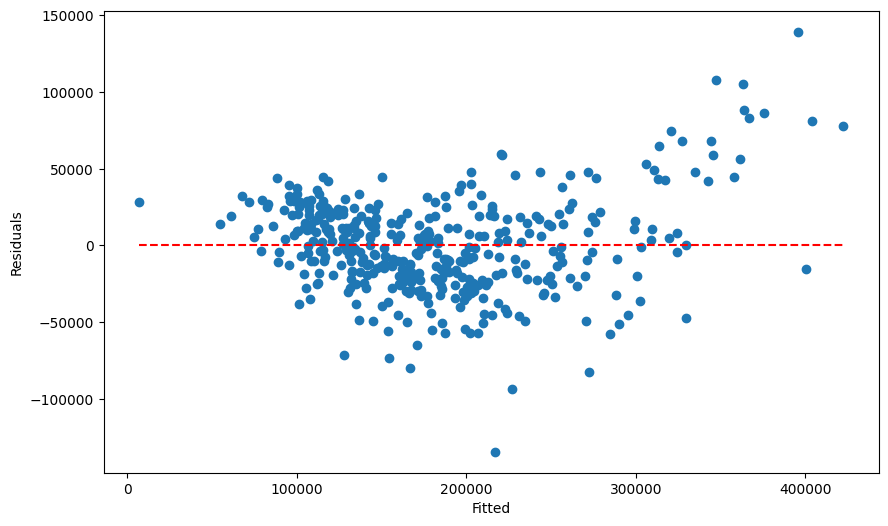

In [ ]:
# Another view Residuals vs Fitted (Predicted) Values - Constant var Scatter
plt.figure(figsize = (10,6))
plt.scatter(y_pred, res)
plt.xlabel("Fitted")
plt.ylabel("Residuals")
plt.hlines(0, min(y_pred), max(y_pred), colors = 'red', linestyles = 'dashed') ;
#We are still clustering along the line.

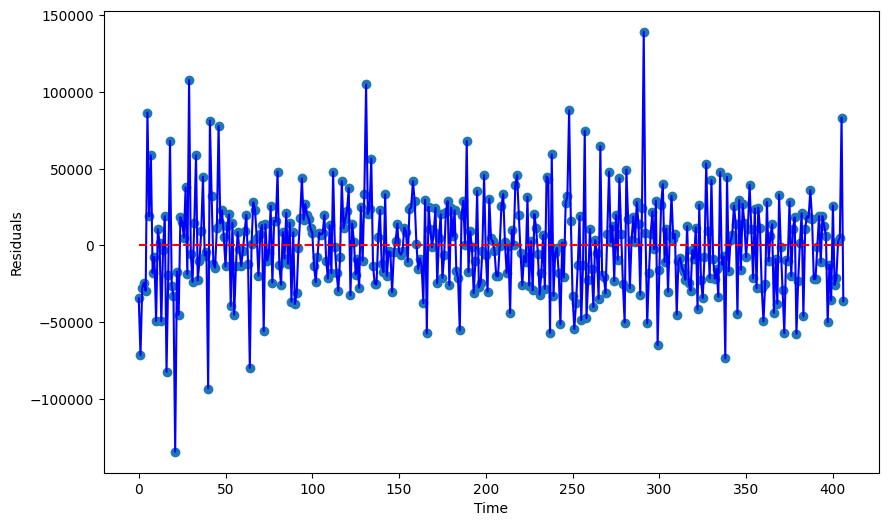

In [ ]:
# Residuals vs Time - indepedence
plt.figure(figsize = (10,6))
plt.scatter(range(len(res)), res)
plt.plot(range(len(res)), res, 'b')
plt.xlabel("Time")
plt.ylabel("Residuals")
plt.hlines(0, min(range(len(res))), max(range(len(res))), colors = 'red', linestyles = 'dashed') ;

##Phase II - begin to incorporate other parameters and model methods to incorporate scaling - pending.

In [ ]:
housing_num_nnull.info()


<class 'pandas.core.frame.DataFrame'>
Index: 2033 entries, 0 to 2636
Data columns (total 37 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MS SubClass      2033 non-null   int64  
 1   Lot Frontage     2033 non-null   float64
 2   Lot Area         2033 non-null   int64  
 3   Overall Qual     2033 non-null   int64  
 4   Overall Cond     2033 non-null   int64  
 5   Year Built       2033 non-null   int64  
 6   Year Remod/Add   2033 non-null   int64  
 7   Mas Vnr Area     2033 non-null   float64
 8   BsmtFin SF 1     2033 non-null   float64
 9   BsmtFin SF 2     2033 non-null   float64
 10  Bsmt Unf SF      2033 non-null   float64
 11  Total Bsmt SF    2033 non-null   float64
 12  1st Flr SF       2033 non-null   int64  
 13  2nd Flr SF       2033 non-null   int64  
 14  Low Qual Fin SF  2033 non-null   int64  
 15  Gr Liv Area      2033 non-null   int64  
 16  Bsmt Full Bath   2033 non-null   float64
 17  Bsmt Half Bath   20